## 1a:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv("~/Desktop/Si.dat", delim_whitespace=True, names = ['T', 'c_v'])

/var/folders/hq/lnf00brj77b5d2m5m3ftbyvr0000gn/T/ipykernel_67334/3373111488.py:4: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv("~/Desktop/Si.dat", delim_whitespace=True, names = ['T', 'c_v'])


In [2]:
df = df[df['T'] < 20]
df['c_v']/= 1000 # convert mJ/K to J/K

Text(0.5, 1.0, 'Silicon Heat Capacity Data')

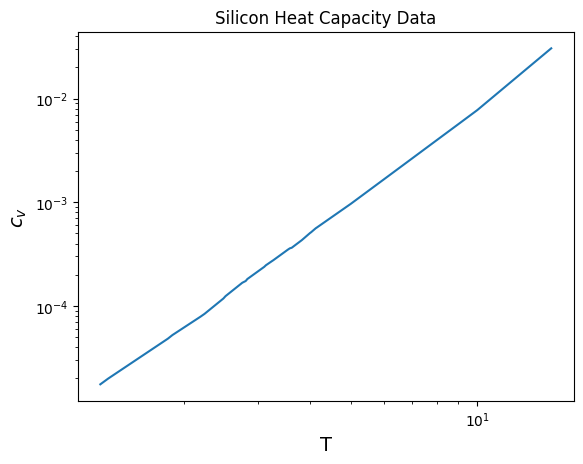

In [3]:
plt.plot(df['T'], df['c_v'])
plt.xscale('log')
plt.yscale('log')
plt.xlabel('T', fontsize=14)
plt.ylabel(r'$c_v$', fontsize=14)
plt.title("Silicon Heat Capacity Data")

In [4]:
from scipy.constants import R

def cv_fit(T, TD):
    return (12/5* np.pi**4 * (R) *(T/TD)**(3))

In [5]:
from scipy.optimize import curve_fit
TD, TDerr = curve_fit(cv_fit, df['T'], df['c_v'], p0 = 645, method = 'lm')


In [6]:
TD # approximate Debye Temperature in Kelvin

array([603.4086124])

Text(0.5, 1.0, 'Si Low Temp. Debye Approximation')

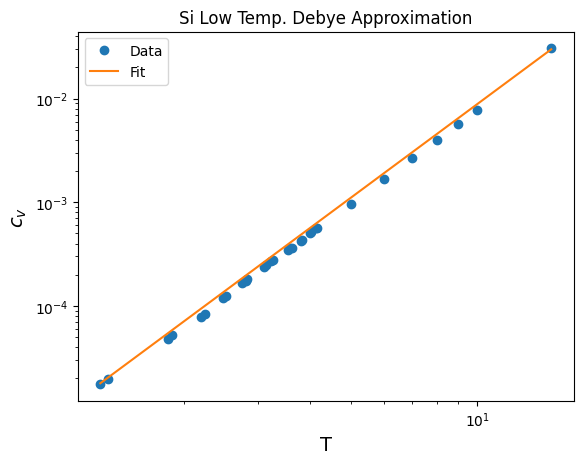

In [7]:
plt.plot(df['T'], df['c_v'], 'o', label = 'Data', )
plt.plot(df['T'], cv_fit(df['T'], TD), label = 'Fit',)
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.xlabel('T', fontsize=14)
plt.ylabel(r'$c_v$', fontsize=14)
plt.title("Si Low Temp. Debye Approximation")

## 1b:

In [8]:
df = pd.read_csv("~/Desktop/Cu.dat", delim_whitespace=True, names = ['T', 'c_v']) # reading in the data again
df['c_v']/= 1000 # convert mJ/K to J/K
# df['c_v']*= 6.022e23

/var/folders/hq/lnf00brj77b5d2m5m3ftbyvr0000gn/T/ipykernel_67334/3326050440.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv("~/Desktop/Cu.dat", delim_whitespace=True, names = ['T', 'c_v']) # reading in the data again


Text(0.5, 1.0, 'Copper Heat Capacity Data')

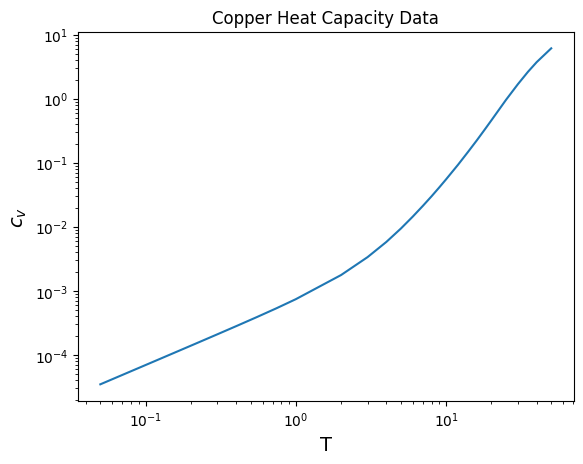

In [15]:
plt.plot(df['T'], df['c_v'])
# df = df[df['T'] <= 10]
plt.xscale('log')
plt.yscale('log')
plt.xlabel('T', fontsize=14)
plt.ylabel(r'$c_v$', fontsize=14)
plt.title("Copper Heat Capacity Data")

In [10]:
from scipy.constants import N_A
def cv_fit(T, TD, ef):
    return ((np.pi**2)/2 * (R**2 * T/ef)/N_A + (12/5* np.pi**4 * (R) *(T/TD)**(3)))

In [11]:
popt, pcov = curve_fit(cv_fit, df['T'], df['c_v'], p0=[343, 1.2e-18], bounds=([0, 0], [np.inf, np.inf]), method='dogbox')

In [12]:
TD, ef = popt

In [13]:
popt

array([3.43e+02, 9.00e-19])

/var/folders/hq/lnf00brj77b5d2m5m3ftbyvr0000gn/T/ipykernel_67334/3332511388.py:3: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


Text(0.5, 1.0, 'Cu Debye Approximation')

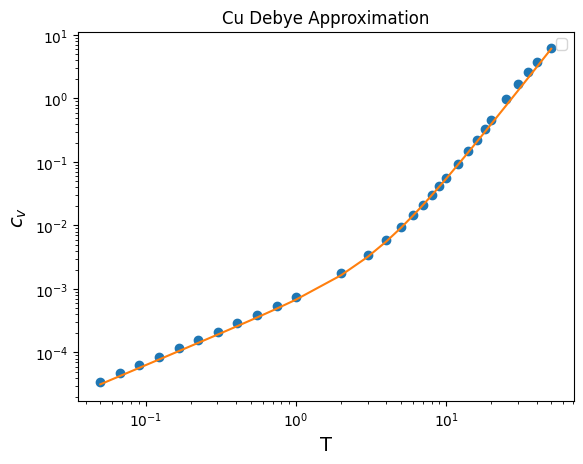

In [14]:
plt.plot(df['T'], df['c_v'], 'o')
plt.plot(df['T'], cv_fit(df['T'], TD, ef))
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.xlabel('T', fontsize=14)
plt.ylabel(r'$c_v$', fontsize=14)
plt.title("Cu Debye Approximation")

# Damn! 
## That fits great!


The last time we found $\epsilon_f$ for Copper, it was $7 e\text{V} = 1.2\times 10^{-18} \text{J}$. So we're within $25\%$ of that value. I can live with that!